# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# print(cities)

['shingu', 'rikitea', 'yellowknife', 'saint-philippe', 'nikolskoye', 'hilo', 'pleshanovo', 'mataura', 'ushuaia', 'ken caryl', 'taolanaro', 'castro', 'pevek', 'atuona', 'hobyo', 'jamestown', 'ratnagiri', 'avarua', 'casper', 'grindavik', 'albany', 'vaini', 'saint george', 'karpogory', 'mrirt', 'sur', 'punta arenas', 'carnarvon', 'kapaa', 'taoudenni', 'lavrentiya', 'port hardy', 'kinanah', 'southbridge', 'east foothills', 'bluff', 'mikhaylovka', 'moerai', 'upernavik', 'hobart', 'kytlym', 'puri', 'bengkulu', 'tongling', 'pafos', 'busselton', 'tezu', 'beloha', 'fairbanks', 'barrow', 'port augusta', 'raga', 'jinchang', 'adelaide', 'namatanai', 'rio grande', 'airai', 'matara', 'puerto ayora', 'najran', 'andros town', 'atambua', 'chokurdakh', 'okhotsk', 'wajima', 'flin flon', 'aasiaat', 'port elizabeth', 'marcona', 'bredasdorp', 'bethel', 'carutapera', 'mar del plata', 'shahrud', 'lorengau', 'vila velha', 'hermanus', 'vardo', 'vila franca do campo', 'trincomalee', 'saint-pierre', 'quatre cocos

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [47]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city = "yellowknife"
country_list = []
max_temp_list = []
clouds_list = []
humidity_list = []
wind_list = []
lat_list = []
long_list = []
date_list = []
city_number = []
final_cities = []

# Build query URL
counter = 1
for city in cities:
    weather_json = requests.get(url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units).json()   
#     print("----------------------------------------------")
    try:
        country_list.append(weather_json["sys"]["country"])
        max_temp_list.append(weather_json["main"]["temp_max"])
        clouds_list.append(weather_json["clouds"]["all"])
        humidity_list.append(weather_json["main"]["humidity"])
        lat_list.append(weather_json["coord"]["lat"])
        long_list.append(weather_json["coord"]["lon"])
        date_list.append(weather_json["dt"])
        wind_list.append(weather_json["wind"]["speed"])
        final_cities.append(weather_json["name"])
        city_number.append(counter)
        print(f"Processing city number {counter}: {city.title()}.")
        counter = counter + 1
    except:
        print(f"Weather data for {city.title()} not found, skipping...")
        pass

# # weather_json = weather_response.json()
# weather_json = requests.get(url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units).json()
# lat_list.append(weather_json["coord"]["lat"])
# long_list.append(weather_json["coord"]["lon"])
# date_list.append(weather_json["dt"])
# wind_list.append(weather_json["wind"]["speed"])
# final_cities.append(weather_json["name"])
# print(wind_list)
# print(final_cities)
# print(lat_list)
# print(long_list)
# print(date_list)
# pprint(weather_json)


Processing city number 1: Shingu.
Processing city number 2: Rikitea.
Processing city number 3: Yellowknife.
Processing city number 4: Saint-Philippe.
Processing city number 5: Nikolskoye.
Processing city number 6: Hilo.
Processing city number 7: Pleshanovo.
Processing city number 8: Mataura.
Processing city number 9: Ushuaia.
Processing city number 10: Ken Caryl.
Weather data for Taolanaro not found, skipping...
Processing city number 11: Castro.
Processing city number 12: Pevek.
Processing city number 13: Atuona.
Processing city number 14: Hobyo.
Processing city number 15: Jamestown.
Processing city number 16: Ratnagiri.
Processing city number 17: Avarua.
Processing city number 18: Casper.
Processing city number 19: Grindavik.
Processing city number 20: Albany.
Processing city number 21: Vaini.
Processing city number 22: Saint George.
Processing city number 23: Karpogory.
Weather data for Mrirt not found, skipping...
Processing city number 24: Sur.
Processing city number 25: Punta Are

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [120]:
# print(len(country_list))
# print(len(lat_list))
# print(len(long_list))
# print(len(date_list))
# print(len(max_temp_list))
# print(len(clouds_list))
# print(len(humidity_list))
# print(len(wind_list))




city_df = pd.DataFrame({
    "Number" : city_number,
    "City": final_cities,
    "Country": country_list,
    "Latitude" : lat_list ,
    "Longitude" : long_list ,
    "Date" : date_list ,
    "Max Temp (C)": max_temp_list,
    "Cloudiness %" : clouds_list,
    "Humidity %" : humidity_list,
    "Wind Speed (kph)" : wind_list 
})
city_df.count()

Number              537
City                537
Country             537
Latitude            537
Longitude           537
Date                537
Max Temp (C)        537
Cloudiness %        537
Humidity %          537
Wind Speed (kph)    537
dtype: int64

In [1]:
# # Output File (CSV)
# output_data_file = "../output/cities.csv"
city_df.set_index('Number')
city_df.to_csv(output_data_file, index=False, header=True)
city_df.head(10)
print(city_df["Latitude"].min())
print(city_df["Latitude"].max())

NameError: name 'city_df' is not defined

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

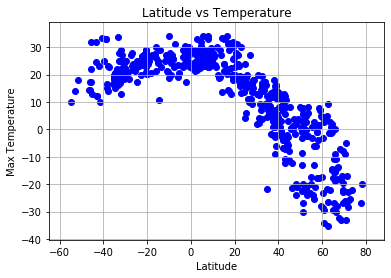

In [122]:
# x_axis = np.arange(city_df["Latitude"].min(), city_df["Latitude"].max(), 20)



plt.scatter( city_df["Latitude"], city_df["Max Temp (C)"], marker="o", color="blue")
plt.title("Latitude vs Temperature")
plt.xlim((city_df["Latitude"].min())-10, (city_df["Latitude"].max()) +10)
plt.ylim((city_df["Max Temp (C)"].min())-5, (city_df["Max Temp (C)"].max()) +5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()
plt.savefig("../output/LatVsTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

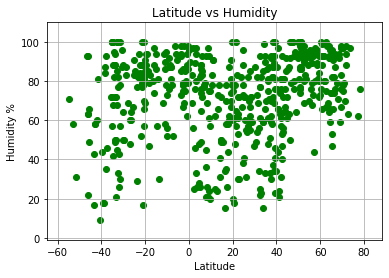

In [123]:
plt.scatter( city_df["Latitude"], city_df["Humidity %"], marker="o", color="green")
plt.title("Latitude vs Humidity")
plt.xlim((city_df["Latitude"].min())-10, (city_df["Latitude"].max()) +10)
plt.ylim((city_df["Humidity %"].min())-10, (city_df["Humidity %"].max()) +10)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.grid()
plt.savefig("../output/LatVsHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

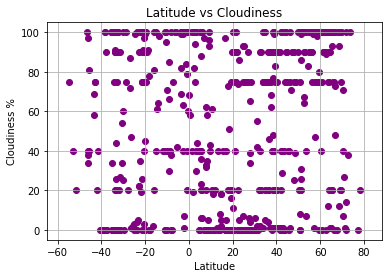

In [124]:
plt.scatter( city_df["Latitude"], city_df["Cloudiness %"], marker="o", color="purple")
plt.title("Latitude vs Cloudiness")
plt.xlim((city_df["Latitude"].min())-10, (city_df["Latitude"].max()) +10)
plt.ylim((city_df["Cloudiness %"].min())-5, (city_df["Cloudiness %"].max()) +5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.grid()
plt.savefig("../output/LatVsCloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

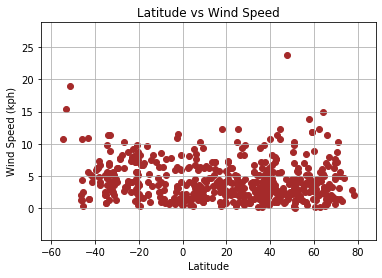

In [126]:
plt.scatter( city_df["Latitude"], city_df["Wind Speed (kph)"], marker="o", color="brown")
plt.title("Latitude vs Wind Speed")
plt.xlim((city_df["Latitude"].min())-10, (city_df["Latitude"].max()) +10)
plt.ylim((city_df["Wind Speed (kph)"].min())-5, (city_df["Wind Speed (kph)"].max()) +5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (kph)")
plt.grid()
plt.savefig("../output/LatVsWind.png")
plt.show()

## Linear Regression

In [145]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg(x_column, y_column):
    x_values = x_column
    y_values = y_column
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_column.min() + 5,y_column.min() +5),fontsize=15,color="red")
    plt.xlabel(f'{x_column.name}')
    plt.ylabel(f'{y_column.name}')
    print(f"The r-squared is: {rvalue}")
    plt.savefig(f"../output/LinReg{x_column.name}{y_column.name}.png")
    plt.show()

# linreg(north["Latitude"], north["Max Temp"])

In [146]:
# Create Northern and Southern Hemisphere DataFrames
north = city_df.loc[city_df["Latitude"] >= 0, :]
north = north.rename(columns={"Latitude":"N Latitude"})
south = city_df.loc[city_df["Latitude"] < 0, :]
south = south.rename(columns={"Latitude":"S Latitude"})

# south.head(30)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8600601349485046


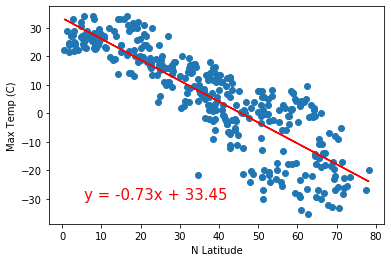

In [148]:
# x_values = north["Latitude"]
# y_values = north["Max Temp (C)"]
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(north["Latitude"].min() + 5,north["Max Temp"].min() +5),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Max Temp')
# print(f"The r-squared is: {rvalue}")
# plt.show()

linreg(north["N Latitude"], north["Max Temp (C)"])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.449347263046248


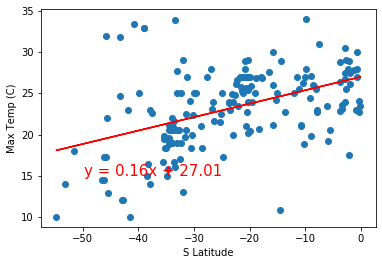

In [149]:
linreg(south["S Latitude"], south["Max Temp (C)"])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3764684177479645


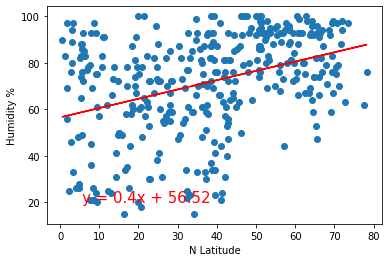

In [150]:
linreg(north["N Latitude"], north["Humidity %"])

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36093825453468126


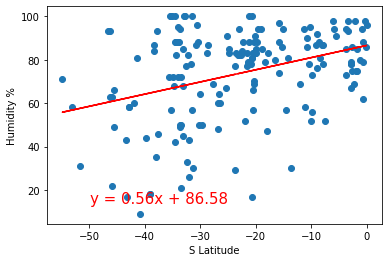

In [151]:
linreg(south["S Latitude"], south["Humidity %"])

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.25018407013642385


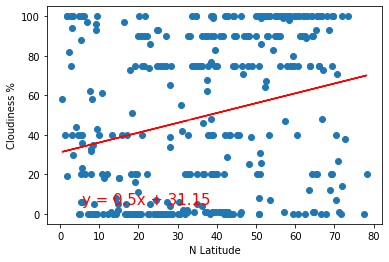

In [152]:
linreg(north["N Latitude"], north["Cloudiness %"])

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.15165595310820384


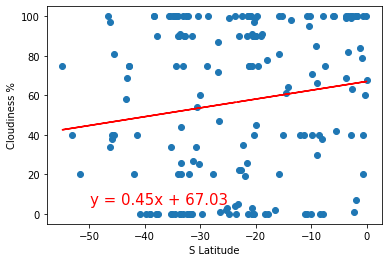

In [153]:
linreg(south["S Latitude"], south["Cloudiness %"])

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05580845407969838


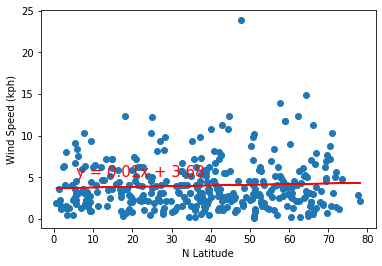

In [154]:
linreg(north["N Latitude"], north["Wind Speed (kph)"])

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23997239806544904


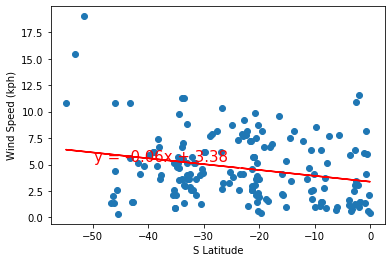

In [155]:
linreg(south["S Latitude"], south["Wind Speed (kph)"])